In [2]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [5]:
data.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [6]:
data

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,1097,24,71.000,1,0,0,100,0,1,...,1,1,2,0,364,475,734,1,770,802
528,1,154,21,52.300,1,0,0,90,0,1,...,1,1,2,0,415,181,84,1,949,666
529,1,588,16,63.000,1,0,0,100,0,1,...,1,1,3,0,299,214,124,1,546,471
530,0,395,17,102.967,1,0,0,100,0,1,...,1,1,3,0,373,218,-1,0,1759,1030


In [7]:
Counter(data['censor'])

Counter({0: 351, 1: 181})

In [8]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [9]:
X.head()

,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,1090,43,66.679,0,1,0,100,0,1,1,...,1,1,3,0,504,353,660,1,870,782
1,794,31,73.030,0,1,0,100,0,1,1,...,1,1,3,0,244,225,106,1,708,699
2,957,41,66.226,0,1,1,100,0,1,1,...,1,1,3,0,401,366,453,1,889,720
3,188,35,78.019,0,1,0,100,0,1,1,...,1,1,3,0,221,132,-1,0,221,759
4,308,40,83.009,0,1,0,100,0,1,1,...,1,1,3,1,150,90,20,1,1730,1160


In [10]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: censor, dtype: int64

In [11]:
idx = list(range(data.shape[0]))

In [12]:
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [13]:
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2024)

In [14]:
print("Train data : {}".format(len(train_idx)))
print("Validation data : {}".format(len(valid_idx)))

Train data : 372
Validation data : 160


In [15]:
print("Train Y data : {}".format(Counter(Y.iloc[train_idx])))
print("Test Y data : {}".format(Counter(Y.iloc[valid_idx])))

Train Y data : Counter({0: 248, 1: 124})
Test Y data : Counter({0: 103, 1: 57})


In [16]:
# AdaBoost Hyperparameter
estimators = [70, 90, 100]
learning = [0.01, 0.03, 0.05, 0.1, 0.5]

# Modeling
save_est = []
save_lr = []
f1_score_ = []

cnt = 0
for est in estimators:
    for lr in learning:
        print(">>> {} <<<".format(cnt))
        cnt += 1
        print("Number of Estimators : {}, Learning Rate : {}".format(est, lr))
        
        model = AdaBoostClassifier(n_estimators=est, learning_rate=lr, random_state=119)
        model.fit(X.iloc[train_idx], Y.iloc[train_idx])

        # Train Acc
        y_pre_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
        print("Train Confusion Matrix")
        print(cm_train)
        print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
        print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

        # Test Acc
        y_pre_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
        print("Test Confusion Matrix")
        print(cm_test)
        print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
        print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
        print("-----------------------------------------------------------------------")
        print("-----------------------------------------------------------------------")
        save_est.append(est)
        save_lr.append(lr)
        f1_score_.append(f1_score(Y.iloc[valid_idx], y_pre_test))

>>> 0 <<<
Number of Estimators : 70, Learning Rate : 0.01
Train Confusion Matrix
[[190  58]
 [  5 119]]
Train Acc : 0.8306451612903226
Train F1-Score : 0.7906976744186047
Test Confusion Matrix
[[79 24]
 [ 5 52]]
TesT Acc : 0.81875
Test F1-Score : 0.7819548872180451
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 1 <<<
Number of Estimators : 70, Learning Rate : 0.03
Train Confusion Matrix
[[205  43]
 [  5 119]]
Train Acc : 0.8709677419354839
Train F1-Score : 0.8321678321678323
Test Confusion Matrix
[[87 16]
 [ 6 51]]
TesT Acc : 0.8625
Test F1-Score : 0.8225806451612904
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 2 <<<
Number of Estimators : 70, Learning Rate : 0.05
Train Confusion Matrix
[[217  31]
 [  7 117]]
Train Acc : 0.8978494623655914
Train F1-Score : 0.8602941176470589
Test Confu

In [17]:
print(">>> {} <<<\nBest Test f1-score : {}\nBest n_estimators : {}\nBest Learning Rate : {}".format(np.argmax(f1_score_),
                                                                                                    f1_score_[np.argmax(f1_score_)], 
                                                                                                    save_est[np.argmax(f1_score_)],
                                                                                                    save_lr[np.argmax(f1_score_)]))

>>> 4 <<<
Best Test f1-score : 0.8275862068965518
Best n_estimators : 70
Best Learning Rate : 0.5


In [18]:
best_model = AdaBoostClassifier(n_estimators=save_est[np.argmax(f1_score_)], learning_rate=save_lr[np.argmax(f1_score_)], random_state=119)
best_model.fit(X.iloc[train_idx], Y.iloc[train_idx])

# Train Acc
y_pre_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
print("Train Confusion Matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

# Test Acc
y_pre_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
print("Test Confusion Matrix")
print(cm_test)
print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))

Train Confusion Matrix
[[236  12]
 [ 10 114]]
Train Acc : 0.9408602150537635
Train F1-Score : 0.912
Test Confusion Matrix
[[92 11]
 [ 9 48]]
TesT Acc : 0.875
Test F1-Score : 0.8275862068965518


In [19]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.185714    cd420
1   0.142857    cd496
2   0.114286    event
3   0.100000     wtkg
4   0.100000     cd40
5   0.071429     cd80
6   0.071429      age
7   0.057143        r
8   0.057143  preanti
9   0.042857     race
10  0.042857    cd820
11  0.014286   oprior
12  0.000000   zprior
13  0.000000      z30
14  0.000000  symptom
15  0.000000    strat
16  0.000000     str2
17  0.000000   karnof
18  0.000000     homo
19  0.000000     hemo
20  0.000000   gender
21  0.000000    drugs


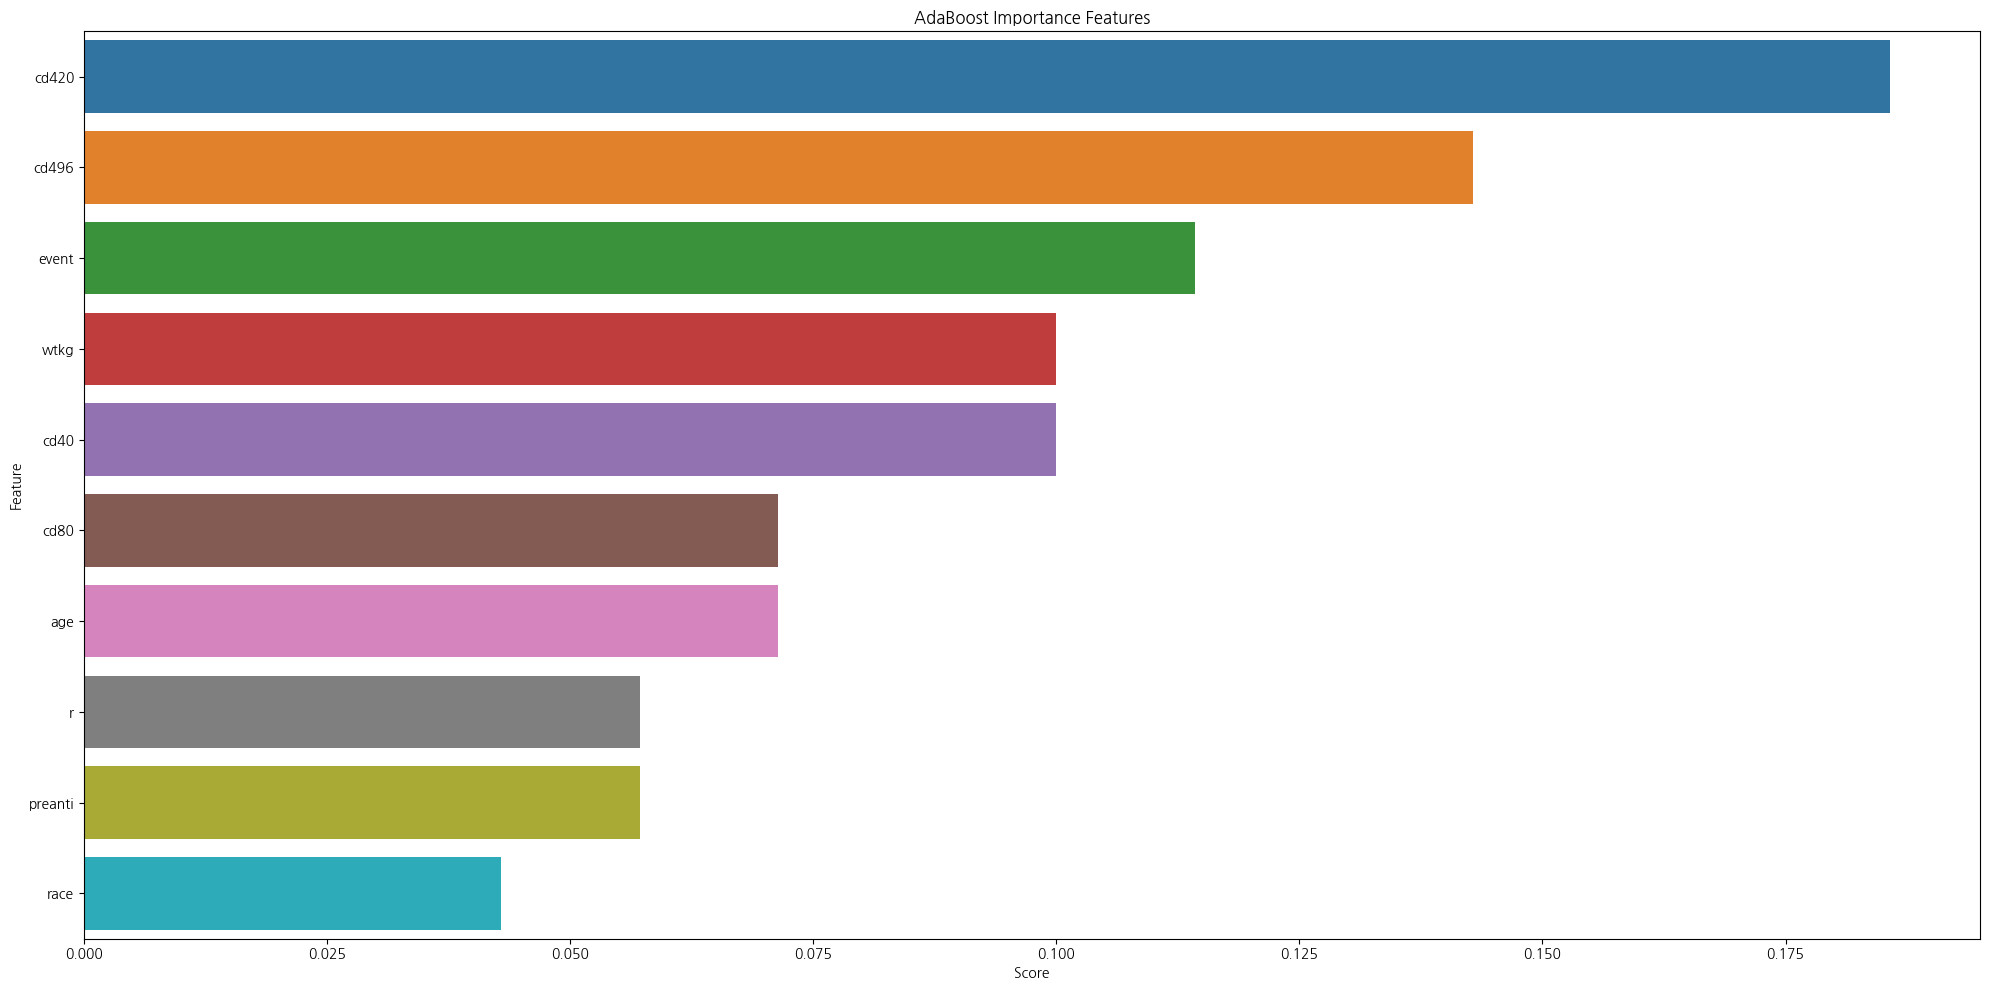

In [25]:
# Importance Score Top 10
feature_map_10 = feature_map.iloc[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Score", y="Feature", data=feature_map_10.sort_values(by="Score", ascending=False), errwidth=40)
plt.title('AdaBoost Importance Features')
plt.tight_layout()
plt.show()